### Please save credentials with test before running this

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from numpy import pi
from gates import *


## Define circuit

In [ ]:
circ = QuantumCircuit(8, 4)

circ.h(range(4))
circ.x(4)
circ.barrier(range(8))

# 2^j mod 15
circ.cx(1, 4)
circ.cx(1, 6)
circ.cswap(0, 4, 5)
circ.cswap(0, 6, 7)

circ.barrier(range(8))
circ.append(qft_gate(4).inverse(), range(4))

circ.barrier(range(8))
circ.measure(range(4), range(4))
circ.draw("mpl")


## Test circuit


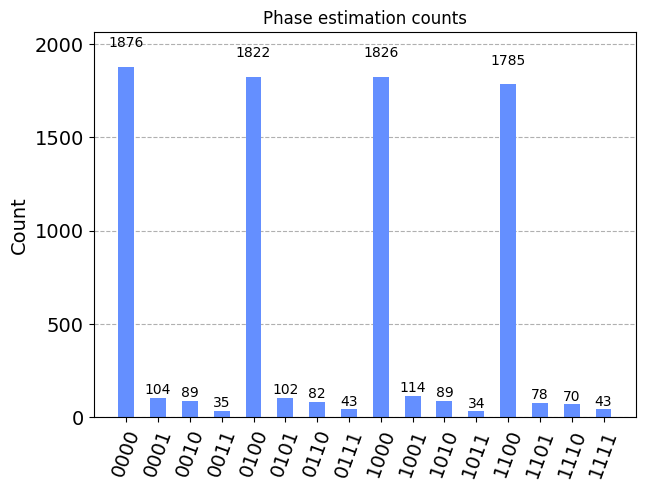

In [10]:
from qiskit.providers.fake_provider import FakeCairo
device_backend = FakeCairo()
sim_vigo = AerSimulator.from_backend(device_backend)

simulator = Aer.get_backend('aer_simulator')
transpiled_circ = transpile(circ, sim_vigo)
result = sim_vigo.run(transpiled_circ, shots=8192).result()
counts = result.get_counts(transpiled_circ)
plot_histogram(counts, title='Phase estimation counts')

## Run on IBM (This costs money)


job id: ci2sacf2vb9d650u6i9g
SamplerResult(quasi_dists=[{12: 0.2666015625, 8: 0.2294921875, 4: 0.244140625, 0: 0.259765625}], metadata=[{'shots': 1024}])


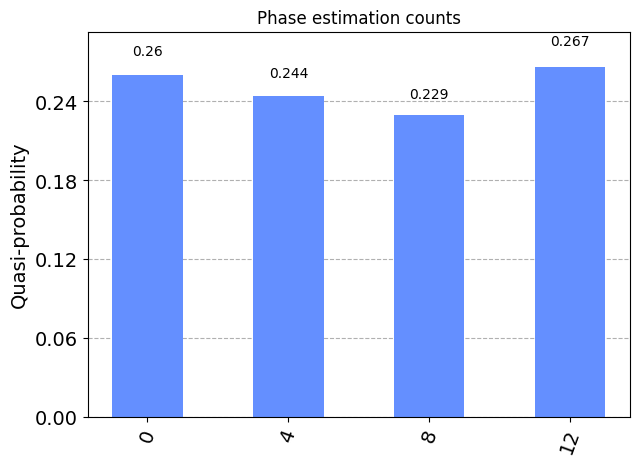

In [13]:
service = QiskitRuntimeService("ibm_cloud")
#backend = service.backend("ibm_algiers")
backend = service.backend("ibmq_qasm_simulator")

options=Options()
#options.max_execution_time=5
options.execution.shots=1024

job = Sampler(backend, options=options).run(circ)
print(f"job id: {job.job_id()}")
phase_estimation_result = job.result()
print(phase_estimation_result)
counts = phase_estimation_result.quasi_dists[0]
plot_histogram(counts, title='Phase estimation counts')

In [17]:
result = transpile(circ, basis_gates=["cx", "id", "rz", "sx", "x"], optimization_level=2, seed_transpiler=1)
#result.draw("mpl")
result.count_ops()
